## Actual Model Creation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,mean_squared_error,roc_curve #our evaluation metrics
from sklearn.tree import DecisionTreeClassifier
# Keras specific
import keras
#from keras.models import Sequential
#from keras.layers import Dense

from tensorflow.python.keras.layers import Dense
#from tensorflow.python.keras import Sequential
from tensorflow.keras.models import Sequential


from keras.utils import to_categorical
#from tensorflow.keras import backend
from tensorflow.keras import backend as k

Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:496: FutureWarn

ModuleNotFoundError: No module named 'tensorflow.keras'

In [2]:
df = pd.read_csv("df_h_s.csv", index_col=0)

In [57]:
one_hot = pd.get_dummies(df["mood"])
df = df.drop('mood',axis = 1)
df = df.join(one_hot)

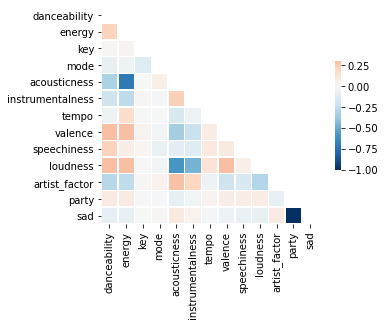

In [59]:
corr = df.corr()
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,cmap = "RdBu_r", mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
corr = df.corr()
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,cmap = "RdBu_r", mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [3]:
df["artist_factor"] = pd.factorize(df["artist"])[0]

In [23]:
party = df[df["mood"] == "party"].sample(5083)
#party

In [24]:
sad = df[df["mood"] == "sad"]
#sad

In [26]:
df_balanced = pd.concat([party,sad])

In [27]:
df_balanced.sample(5)

,title,meta,id,danceability,energy,key,mode,acousticness,instrumentalness,tempo,valence,speechiness,loudness,artist,mood,artist_factor
1141,Festina,spotify:track:7LHhNGMv8uMjPLoC774LMs,7LHhNGMv8uMjPLoC774LMs,0.541,0.279,10,0,0.7440,0.462000,134.072,0.0582,0.0329,-16.585,Thomas Bartlett,sad,3988
8141,Work Out,spotify:track:6rbeWjEavBHvX2kr6lSogS,6rbeWjEavBHvX2kr6lSogS,0.831,0.427,2,1,0.0531,0.000000,93.004,0.2160,0.1060,-6.903,J. Cole,party,139
10863,Fancy,spotify:track:3oqCnpAoHf3SDFynxx7AU4,3oqCnpAoHf3SDFynxx7AU4,0.911,0.709,10,0,0.1050,0.000000,94.979,0.3650,0.0673,-4.139,Iggy Azalea,party,1632
1376,Welcome to Wonderland,spotify:track:3JfHYZKy5JmE5Fv4gDTCiz,3JfHYZKy5JmE5Fv4gDTCiz,0.703,0.179,4,1,0.9490,0.000000,97.427,0.3460,0.0366,-10.906,Anson Seabra,sad,3721
10044,Let Go.,spotify:track:2UvXuAWF5z0MUtWMRH5vK5,2UvXuAWF5z0MUtWMRH5vK5,0.458,0.659,7,1,0.0681,0.000002,174.105,0.2380,0.0480,-5.976,Judah & the Lion,party,3348


In [14]:
pd.set_option("display.max_rows",None)
df[df.artist == "Drake"].sort_values("title")


,title,meta,id,danceability,energy,key,mode,acousticness,instrumentalness,tempo,valence,speechiness,loudness,artist,mood
4873,0 To 100 / The Catch Up,spotify:track:4jtyUzZm9WLc2AdaJ1dso7,4jtyUzZm9WLc2AdaJ1dso7,0.559,0.716,11,0,0.737000,0.000000,176.618,0.5040,0.3900,-3.964,Drake,party
10910,0 To 100 / The Catch Up,spotify:track:0mkjekH9rwp4Fg5PxzUTrd,0mkjekH9rwp4Fg5PxzUTrd,0.559,0.716,11,0,0.737000,0.000000,176.618,0.5040,0.3900,-3.964,Drake,party
9817,10 Bands,spotify:track:12d5QFwzh60IIHlsSnAvps,12d5QFwzh60IIHlsSnAvps,0.825,0.756,11,0,0.265000,0.000002,172.938,0.8880,0.3830,-3.687,Drake,party
4420,4422,spotify:track:2fkeWbM6iqTw7oGHTYm2lw,2fkeWbM6iqTw7oGHTYm2lw,0.609,0.229,11,0,0.558000,0.041300,111.887,0.1900,0.0333,-12.360,Drake,sad
284,5 Am in Toronto,spotify:track:0FnxK9FEAQyPJ284QcieNb,0FnxK9FEAQyPJ284QcieNb,0.555,0.880,11,0,0.067800,0.000000,87.195,0.3910,0.2650,-4.325,Drake,party
9805,6 God,spotify:track:3a8tAZFJxlmBwOtrf5L1oC,3a8tAZFJxlmBwOtrf5L1oC,0.868,0.623,2,1,0.024900,0.000000,105.446,0.4980,0.1010,-8.595,Drake,party
9793,6 Man,spotify:track:4kdfjhj9xNkYU0R8xlDy8k,4kdfjhj9xNkYU0R8xlDy8k,0.568,0.535,4,1,0.217000,0.000000,83.589,0.3260,0.5130,-9.306,Drake,party
254,All Me,spotify:track:7y911sqgHGHcyU4ivapjwi,7y911sqgHGHcyU4ivapjwi,0.670,0.515,1,1,0.070500,0.000000,122.006,0.4220,0.3970,-6.977,Drake,party
12515,All Me,spotify:track:2ImkKA3gvJ3MyRMhWO3J5E,2ImkKA3gvJ3MyRMhWO3J5E,0.870,0.502,1,1,0.073800,0.000000,122.046,0.4020,0.3020,-6.940,Drake,party
10528,All Me,spotify:track:4kNvYhyl8R6m1vykVkcuBu,4kNvYhyl8R6m1vykVkcuBu,0.670,0.515,1,1,0.070500,0.000000,122.006,0.4220,0.3970,-6.977,Drake,party


In [97]:
round(math.sqrt(df.artist_factor.nunique()))

72

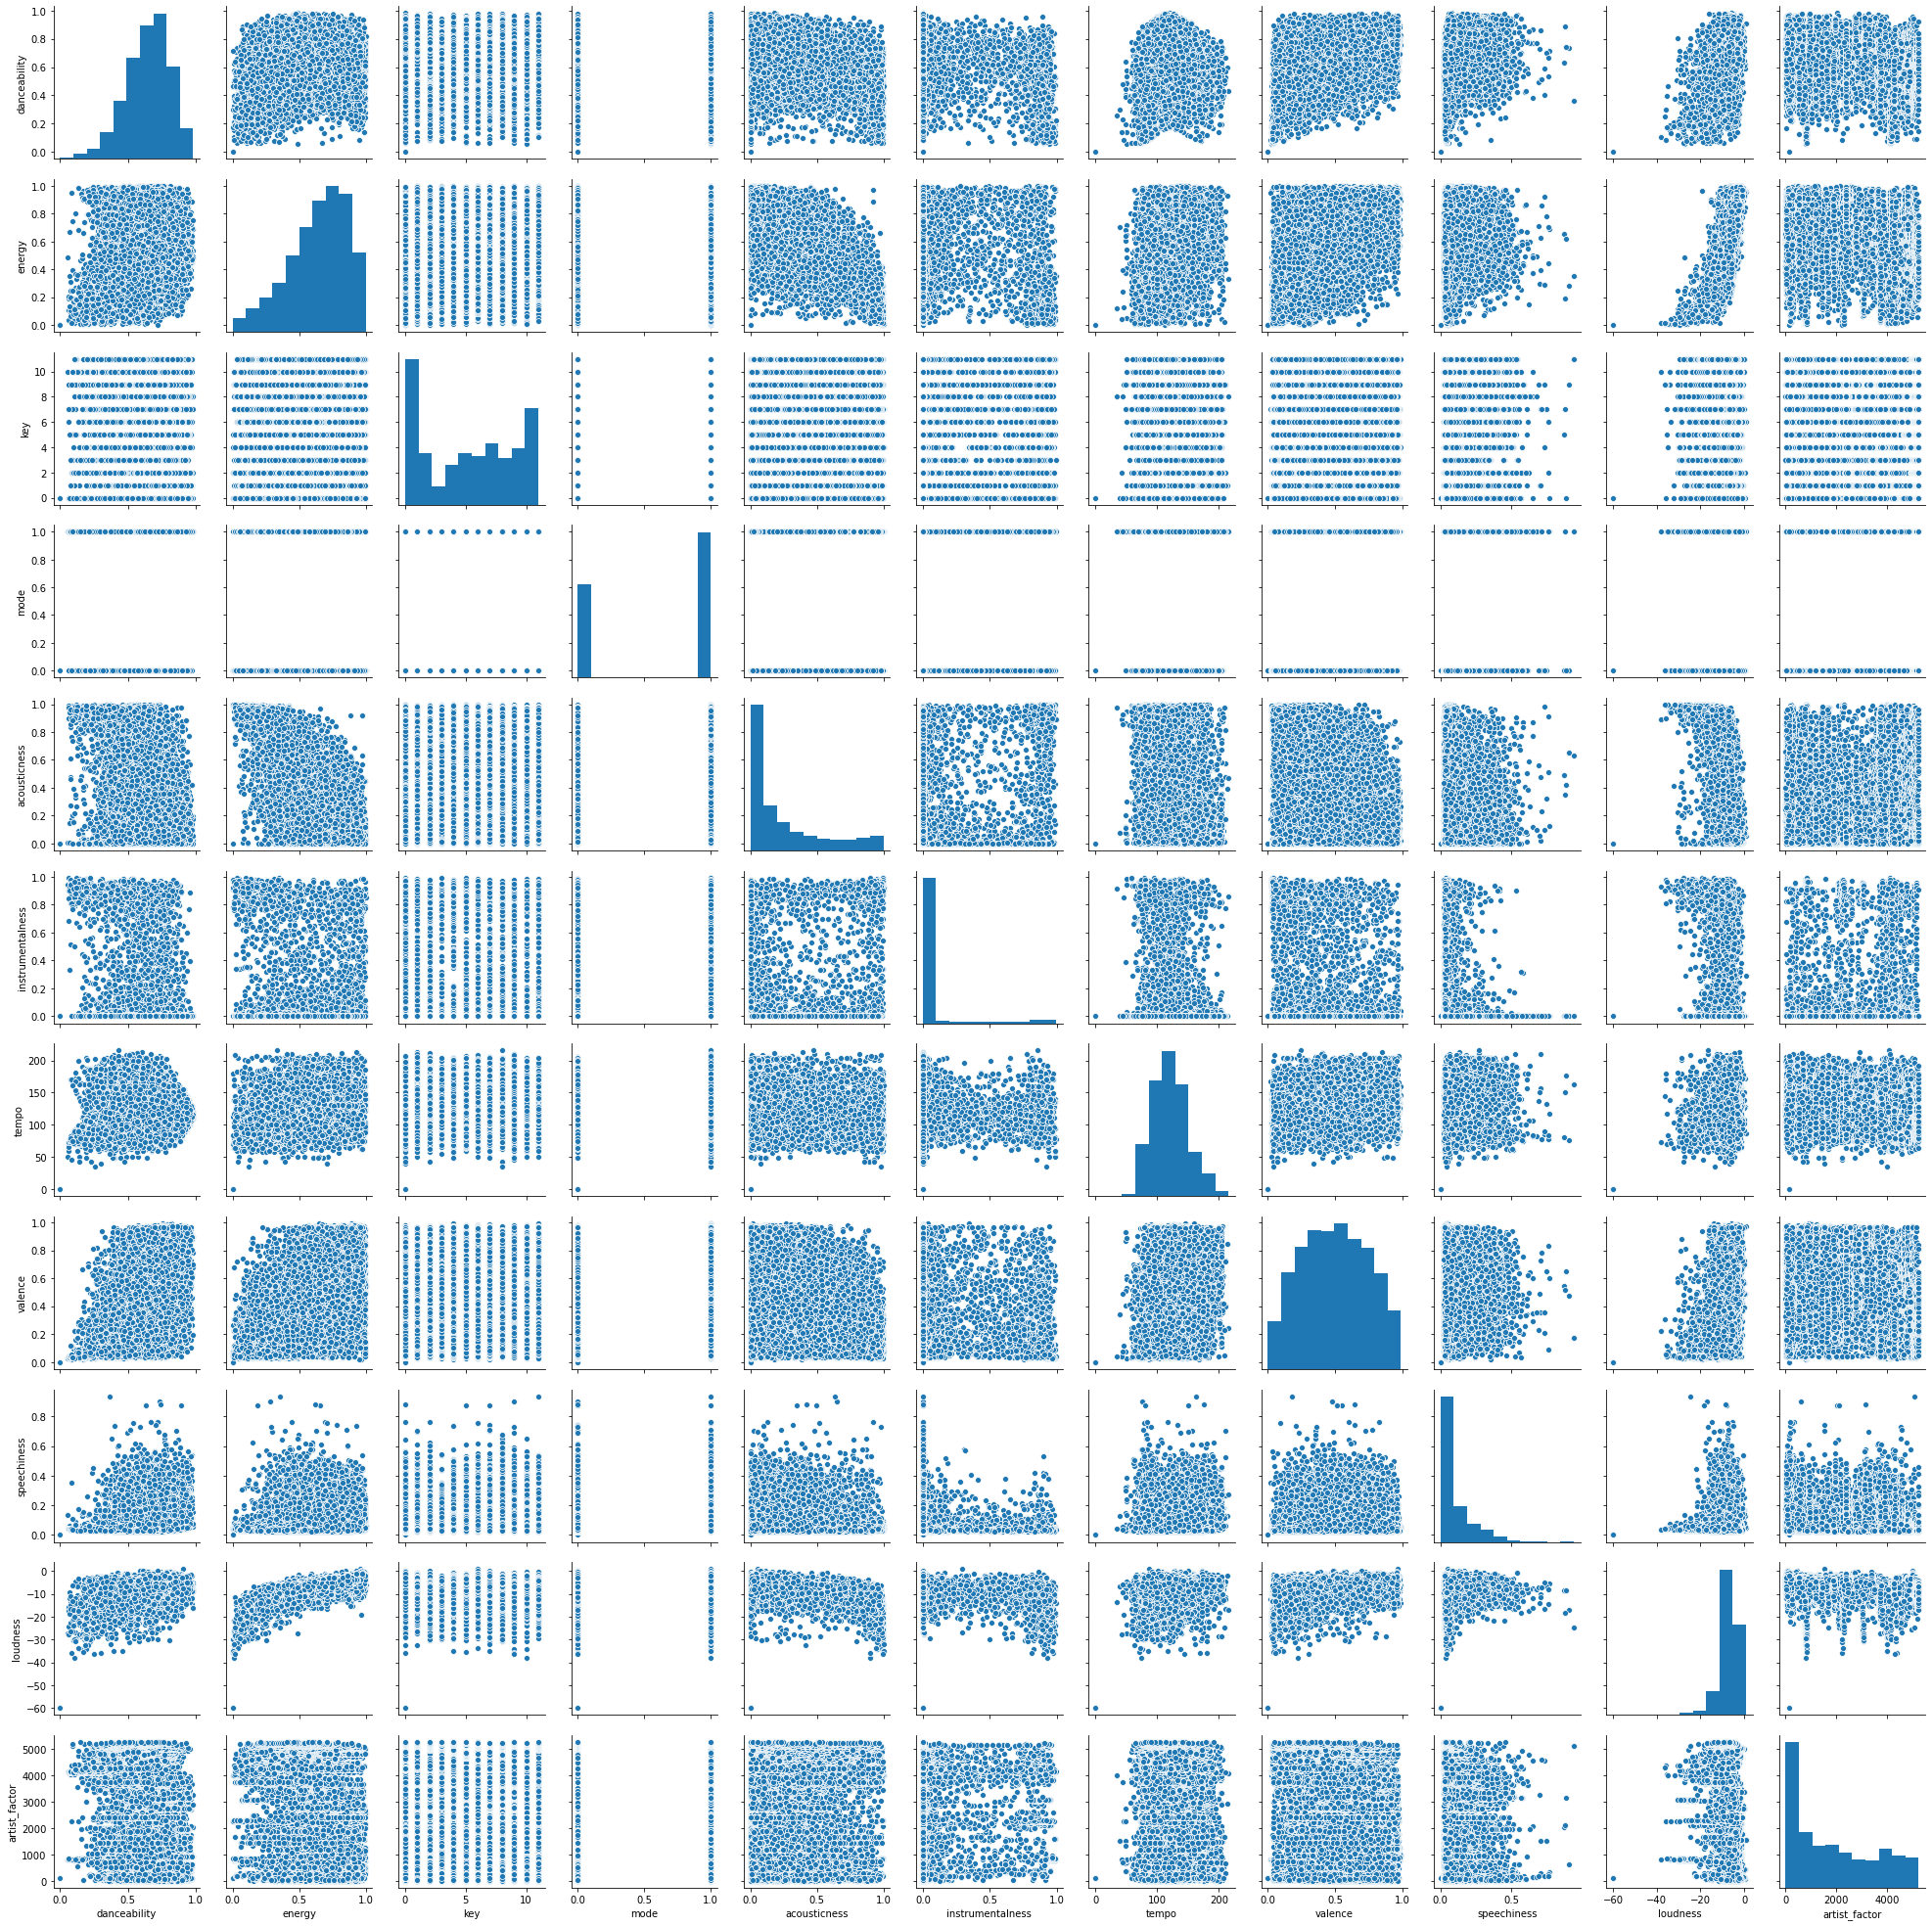

In [5]:
sns.pairplot(df)

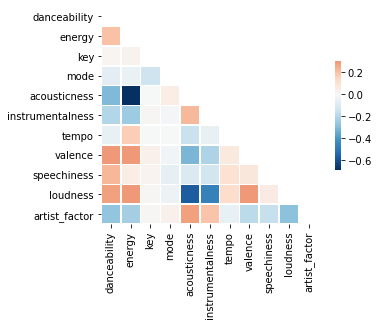

In [6]:
corr = df.corr()
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,cmap = "RdBu_r", mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Attempt on only numerical data, linear kernel

In [158]:
#X = df.drop(["mood","id","meta"],axis = 1)
X = df_balanced.drop(["mood","id","meta","title","artist","artist_factor"],axis = 1) #attempt on only numerical data
#X = df_balanced.drop(["mood","id","meta","title","artist","key","mode","artist_factor"],axis = 1) #attempt on only numerical data
y = df_balanced["mood"]

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [160]:
svclassifier = SVC(kernel = "linear" )
svclassifier.fit(X_train,y_train) #fit on training data

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [164]:
y_pred = svclassifier.predict(X_test)

In [54]:
##new

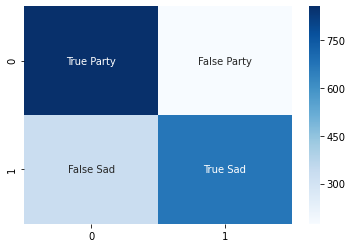

In [165]:
cf_matrix = confusion_matrix(y_test,y_pred)
labels = ['True Party','False Party','False Sad','True Sad']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, fmt="",cmap='Blues', annot = labels)

In [166]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

      party       0.72      0.83      0.77      1030
        sad       0.79      0.67      0.73      1004

avg / total       0.76      0.75      0.75      2034



In [167]:
accuracy = accuracy_score(y_test, y_pred)

## Attempt  with a polynomial kernel, same data

In [40]:
svclassifier = SVC(kernel = "poly",degree = 2 )
svclassifier.fit(X_train,y_train) #fit on training data
y_pred = svclassifier.predict(X_test)

In [41]:
svclassifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

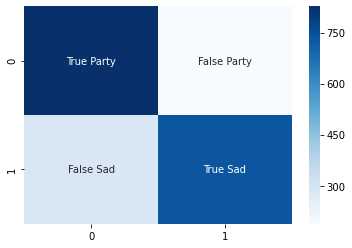

In [42]:
cf_matrix = confusion_matrix(y_test,y_pred)
labels = ['True Party','False Party','False Sad','True Sad']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, fmt="",cmap='Blues', annot = labels)

In [43]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

      party       0.74      0.81      0.78      1015
        sad       0.80      0.72      0.76      1019

avg / total       0.77      0.77      0.77      2034



In [168]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7507374631268436

## Gaussian Kernel

In [65]:
svclassifier = SVC(kernel = "rbf")
svclassifier.fit(X_train,y_train) #fit on training data
y_pred = svclassifier.predict(X_test)

In [66]:
svclassifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

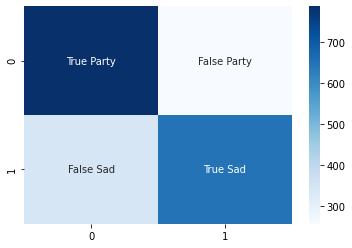

In [67]:
cf_matrix = confusion_matrix(y_test,y_pred)
labels = ['True Party','False Party','False Sad','True Sad']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, fmt="",cmap='Blues', annot = labels)

In [68]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

      party       0.70      0.75      0.72      1043
        sad       0.72      0.65      0.68       991

avg / total       0.71      0.71      0.70      2034



## Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [84]:
r_clf=RandomForestClassifier(n_estimators=100)

In [85]:
r_clf.fit(X_train,y_train)
y_pred_r=r_clf.predict(X_test)

In [86]:
r_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [87]:
accuracy = accuracy_score(y_test, y_pred_r)

In [88]:
accuracy

0.7826941986234022

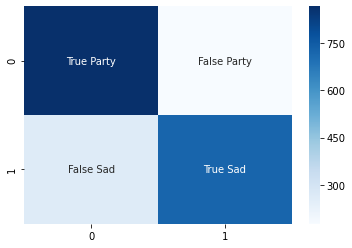

In [90]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_r))
labels = ['True Party','False Party','False Sad','True Sad']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, fmt="",cmap='Blues', annot = labels)

In [92]:
print(classification_report(y_test,y_pred_r))

             precision    recall  f1-score   support

      party       0.77      0.83      0.80      1043
        sad       0.80      0.73      0.77       991

avg / total       0.78      0.78      0.78      2034



## NN with Embedded artist layer

In [115]:
def encode(row):
    if row["mood"] == "party":
        return 0
    else:
        return 1

In [138]:
nn_df = df_balanced.copy()
nn_df["mood"] = nn_df.apply(encode,axis = 1)

In [139]:
target_column = ['mood'] 

In [150]:
predictors = nn_df.drop(["mood","id","meta","title","artist"],axis = 1).columns #attempt on only numerical data
nn_df[predictors] = nn_df[predictors]/nn_df[predictors].max() #normalize to eliminate the impact of units & magnitude on modelling
nn_df.describe()

,danceability,energy,key,mode,acousticness,instrumentalness,tempo,valence,speechiness,loudness,mood,artist_factor
count,10166.000000,10166.000000,10166.000000,10166.000000,10166.000000,10166.000000,10166.000000,10166.000000,10166.000000,10166.000000,10166.000000,10166.000000
mean,0.642040,0.615644,0.479477,0.622861,0.278624,0.077421,0.562726,0.476820,0.107398,-9.005005,0.500000,0.407371
std,0.167523,0.228747,0.329031,0.484694,0.304497,0.225161,0.133482,0.247266,0.109138,4.844202,0.500025,0.331502
min,0.063061,0.001672,0.000000,0.000000,0.000002,0.000000,0.160702,0.019254,0.023825,-43.412396,0.000000,0.000000
25%,0.534694,0.459459,0.181818,0.000000,0.029644,0.000000,0.462736,0.274194,0.039877,-10.975864,0.000000,0.078241
50%,0.657143,0.650651,0.454545,1.000000,0.143072,0.000003,0.562375,0.466734,0.059188,-7.796186,0.500000,0.348182
75%,0.765306,0.798799,0.727273,1.000000,0.466616,0.001239,0.650058,0.670363,0.125000,-5.814660,1.000000,0.737483
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [151]:
X = nn_df[predictors].values
y = nn_df[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(7116, 11)
(3050, 11)


In [142]:
y_train

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [155]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=11)) #input layer
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax')) #output layer

In [156]:
model.compile(optimizer='adam', 
              #loss='categorical_crossentropy', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [157]:
model.fit(X_train, y_train, epochs=20) #epochs represents # of training iterations

Epoch 1/20
223/223 [==============================] - 1s 3ms/step - loss: 0.6937 - accuracy: 0.4996
Epoch 2/20
223/223 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5086
Epoch 3/20
223/223 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5093
Epoch 4/20
223/223 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5059
Epoch 5/20
223/223 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5077
Epoch 6/20
223/223 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5089
Epoch 7/20
223/223 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5073
Epoch 8/20
223/223 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5045
Epoch 9/20
223/223 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4983
Epoch 10/20
223/223 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5107

In [146]:
pred_train= model.predict(X_train) #predicts on train data

In [147]:
scores = model.evaluate(X_train, y_train, verbose=0) #evaluates the model
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   

Accuracy on training data: 0.5102585554122925% 
 Error on training data: 0.4897414445877075


In [148]:
pred_test= model.predict(X_test) #evaluate on test data
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on test data: 0.5022950768470764% 
 Error on test data: 0.4977049231529236


In [149]:
#so its pretty shit ... will tune later

## Introducing a new label

In [174]:
df_p = pd.read_csv("happy_frame.csv")

In [197]:
df_p["artist_factor"] = pd.factorize(df_p["artist"])[0]
df_p.sample()



,Unnamed: 0,title,meta,id,danceability,energy,key,mode,acousticness,instrumentalness,tempo,valence,speechiness,loudness,label,artist,artist_factor
2151,2151,No Promises (feat. Demi Lovato),spotify:track:1louJpMmzEicAn7lzDalPW,1louJpMmzEicAn7lzDalPW,0.741,0.667,10,1,0.0575,0,112.956,0.595,0.134,-5.445,party,Cheat Codes,72


In [176]:
df_s = pd.read_csv("sad_frame.csv")

In [199]:
df_s["artist_factor"] = pd.factorize(df_s["artist"])[0]
df_s.sample()
df_s=df_s.rename(columns = {'mood':'label'}) #rename


In [196]:
df_sex = pd.read_csv("sex_frame.csv")
#df_sex.sample()

,Unnamed: 0,title,meta,id,artist,artist_factor,danceability,energy,key,mode,acousticness,instrumentalness,tempo,valence,speechiness,loudness,label
2605,3164,Beat It - Single Version,spotify:track:1OOtq8tRnDM8kG2gqUPjAj,1OOtq8tRnDM8kG2gqUPjAj,Michael Jackson,1352,0.779,0.867,3,0,0.0491,7.98e-06,138.858,0.915,0.0457,-3.704,sex


In [201]:
df_sex_p_s = pd.concat([df_sex,df_s.sample(3160),df_p.sample(3160)])

In [212]:
#df_sex_p_s.sample(10)
df_sex_p_s = df_sex_p_s[df_sex_p_s.key != "!"]

In [347]:
df_sex_p_s = df_sex_p_s.sample(frac=1).drop_duplicates(subset='id', keep="first") #drop songs that appear more than once

In [348]:
df_sex_p_s.to_csv("sex_p_s.csv")

## SVM, 3 way classification 

In [239]:
#X = df.drop(["mood","id","meta"],axis = 1)
#X = df_sex_p_s.drop(["label","id","meta","title","artist","artist_factor","Unnamed: 0"],axis = 1) #attempt on only numerical data
X = df_sex_p_s.drop(["label","id","meta","title","artist","Unnamed: 0"],axis = 1) #attempt on only numerical data
y = df_sex_p_s["label"]

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [227]:
svclassifier = SVC(kernel = "linear" )
svclassifier.fit(X_train,y_train) #fit on training data

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [228]:
y_pred = svclassifier.predict(X_test)

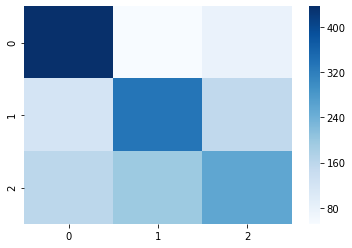

In [229]:
cf_matrix = confusion_matrix(y_test,y_pred)
#labels = ['True Party','False Party','False Sad','True Sad']
#labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, fmt="",cmap='Blues')

In [235]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

      party       0.61      0.77      0.68       566
        sad       0.57      0.55      0.56       607
        sex       0.53      0.42      0.47       616

avg / total       0.57      0.57      0.57      1789



In [234]:
df_sex_p_s.sample(10)

,Unnamed: 0,title,meta,id,artist,artist_factor,danceability,energy,key,mode,acousticness,instrumentalness,tempo,valence,speechiness,loudness,label
1842,2324,Drunk,spotify:track:2cUV93Y7FLGR42ycRRf0bL,2cUV93Y7FLGR42ycRRf0bL,Dijon,928,0.472,0.431,10,1,0.0687,0,123.799,0.284,0.0614,-6.593,sex
120,121,West Coast Love,spotify:track:4NFD9ea0uH0MtoC30yNYE1,4NFD9ea0uH0MtoC30yNYE1,Emotional Oranges,90,0.696,0.65,4,0,0.00666,0.153,91.997,0.587,0.0326,-5.712,sex
2202,2815,High School Musical - Original Version,spotify:track:5m4RHs0THdfyn579MONxcV,5m4RHs0THdfyn579MONxcV,High School Musical Cast,955,0.529,0.931,0,1,0.241,0,165.054,0.624,0.102,-3.022,sad
571,571,"SVP (feat. JoeyAK, Young Ellens & Sevn Alias)",spotify:track:2A7deRNLMvlgq0cRMWhEuD,2A7deRNLMvlgq0cRMWhEuD,Boef,299,0.579,0.814,6,1,0.0955,0,139.904,0.735,0.42,-6.984,party
1449,1801,Invoice,spotify:track:6ElT4uHdezuX6NK2TVv7Bk,6ElT4uHdezuX6NK2TVv7Bk,Nevi,775,0.811,0.398,1,1,0.023,0,127.811,0.243,0.466,-10.712,sex
3150,3150,Hele Bi Gel,spotify:track:5nuGiGWV1tGsLYqi0Y8RmZ,5nuGiGWV1tGsLYqi0Y8RmZ,Pinhani,1376,0.68,0.576,9,0,0.324,0,146.037,0.624,0.0296,-8.637,party
2174,2174,Amor Prohibido,spotify:track:1kCewNSs909Xj1naXr36X8,1kCewNSs909Xj1naXr36X8,Selena,987,0.681,0.504,7,1,0.669,0,89.994,0.705,0.0284,-11.099,party
2057,2669,Fundamentum,spotify:track:1lnWtRgFIarlvMdta3UVGZ,1lnWtRgFIarlvMdta3UVGZ,Lesiem,1008,0.587,0.761,0,1,0.00078,0.589,94.001,0.114,0.0343,-7.657,sad
853,1080,Goodbye To A World,spotify:track:786ymAh5BmHoIpvjyrvjXk,786ymAh5BmHoIpvjyrvjXk,Porter Robinson,457,0.444,0.35,9,1,0.453,0.109,95.979,0.0973,0.0483,-7.194,sad
912,1141,Festina,spotify:track:7LHhNGMv8uMjPLoC774LMs,7LHhNGMv8uMjPLoC774LMs,Thomas Bartlett,500,0.541,0.279,10,0,0.744,0.462,134.072,0.0582,0.0329,-16.585,sad


In [276]:
df_sex_p_s["valence"] = pd.to_numeric(df_sex_p_s["valence"],errors='coerce')
pd.qcut(df_sex_p_s["valence"], 5)

942      (0.545, 0.728]
2163     (0.385, 0.545]
2446    (-0.001, 0.229]
2537     (0.229, 0.385]
2759     (0.385, 0.545]
             ...       
1666     (0.728, 0.992]
765      (0.728, 0.992]
2166    (-0.001, 0.229]
2785     (0.545, 0.728]
650      (0.229, 0.385]
Name: valence, Length: 8945, dtype: category
Categories (5, interval[float64]): [(-0.001, 0.229] < (0.229, 0.385] < (0.385, 0.545] < (0.545, 0.728] < (0.728, 0.992]]

## Random Forest, 3 classes

In [342]:
X = df_sex_p_s.drop(["label","id","meta","title","artist_factor","Unnamed: 0"],axis = 1) #attempt on only numerical data
y = df_sex_p_s["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [343]:
features = df_sex_p_s.drop(["label","id","meta","title","artist","Unnamed: 0"],axis = 1).columns

In [344]:
target_name = df_sex_p_s["label"].unique()
#target_name

In [345]:
r_clf=RandomForestClassifier(n_estimators=100)
r_clf.fit(X_train,y_train)
y_pred_r=r_clf.predict(X_test)

ValueError: could not convert string to float: 'Pereza'

In [302]:
r_clf.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=137080103, splitter='best')

In [303]:
accuracy = accuracy_score(y_test, y_pred_r)

In [304]:
accuracy

0.6802683063163779

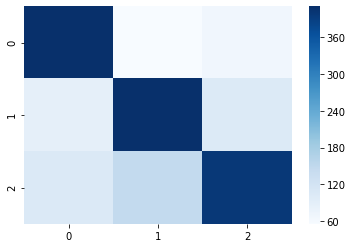

In [305]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_r))
sns.heatmap(cm, fmt="",cmap='Blues')

In [306]:
print(classification_report(y_test,y_pred_r))

             precision    recall  f1-score   support

      party       0.68      0.77      0.72       535
        sad       0.67      0.68      0.67       601
        sex       0.70      0.61      0.65       653

avg / total       0.68      0.68      0.68      1789



In [307]:
print(confusion_matrix(y_test, y_pred_r))

[[410  56  69]
 [ 88 409 104]
 [107 148 398]]


In [ ]:
#Much better results and faster than our neural net & SVM 

## XGBoost RF

In [277]:
from sklearn.model_selection import KFold
import xgboost as xgb

In [333]:
encoder = preprocessing.LabelEncoder()
X = df_sex_p_s.drop(["label","id","meta","title","artist","Unnamed: 0"],axis = 1).astype(float) #attempt on only numerical data
#y = df_sex_p_s["label"]
y = encoder.fit_transform(df_sex_p_s["label"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [334]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [335]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X, y)
y_pred = xgb_model.predict(X)
print(confusion_matrix(y, y_pred))

[[2224  198  356]
 [ 431 2177  479]
 [ 572  738 1770]]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


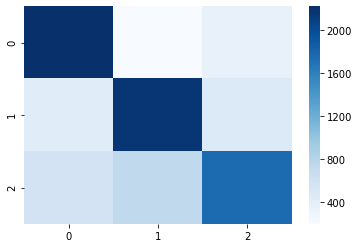

In [336]:
cm = pd.DataFrame(confusion_matrix(y, y_pred))
sns.heatmap(cm, fmt="",cmap='Blues')

In [339]:
print(classification_report(y,y_pred))

             precision    recall  f1-score   support

          0       0.69      0.80      0.74      2778
          1       0.70      0.71      0.70      3087
          2       0.68      0.57      0.62      3080

avg / total       0.69      0.69      0.69      8945



## NN w/ artist embeddings

In [371]:
import categorical_embedder as ce
#from tensorflow.keras.layer import Embedding
df = pd.read_csv('sex_p_s.csv')
X = df.drop(["label","id","meta","title","artist_factor","Unnamed: 0"],axis = 1) #attempt on only numerical data
y = df["label"]
embedding_info = ce.get_embedding_info(X)
X_encoded,encoders = ce.get_label_encoded_data(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y)
embeddings = ce.get_embeddings(X_train, y_train, categorical_embedding_info=embedding_info, 
                            is_classification=True, epochs=100,batch_size=256)

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [362]:
encoders

{'artist': __LabelEncoder__()}

## Introducing angry level

In [449]:
df_p = pd.read_csv("happy_frame.csv")

In [450]:
df_p["artist_factor"] = pd.factorize(df_p["artist"])[0]
df_p.sample()

,Unnamed: 0,title,meta,id,danceability,energy,key,mode,acousticness,instrumentalness,tempo,valence,speechiness,loudness,label,artist,artist_factor
10672,10672,She Twerkin,spotify:track:5zps32cgFG2c43QFKTBdlo,5zps32cgFG2c43QFKTBdlo,0.843,0.748,6,0,0.000426,0,142.015,0.364,0.052,-3.924,party,Ca$h Out,3141


In [451]:
df_angry.shape

(3017, 17)

In [452]:
df_s = pd.read_csv("sad_frame.csv")

In [453]:
df_s["artist_factor"] = pd.factorize(df_s["artist"])[0]
df_s.sample()
df_s=df_s.rename(columns = {'mood':'label'}) #rename


In [454]:
df_angry = pd.read_csv("angry_frame.csv")
#df_sex.sample()

In [455]:
df_angry_p_s = pd.concat([df_angry,df_s.sample(3017),df_p.sample(3017)])

In [456]:
#df_sex_p_s.sample(10)
df_angry_p_s = df_angry_p_s[df_angry_p_s.key != "!"]

In [464]:
df_angry_p_s.sample(10)

,Unnamed: 0,title,meta,id,artist,artist_factor,danceability,energy,key,mode,acousticness,instrumentalness,tempo,valence,speechiness,loudness,label
1957,2443,They,spotify:track:53OAjBw9irOKWuo8yhoQIE,53OAjBw9irOKWuo8yhoQIE,Jem,811,0.728,0.817,5,1,0.0237,2.23e-05,129.978,0.729,0.0413,-5.61,angry
5239,5239,W.Y.F.F.,spotify:track:4JAKJtpuCSYOS0DQ7ZJTs4,4JAKJtpuCSYOS0DQ7ZJTs4,Sonny Denja,2110,0.755,0.898,10,1,0.0173,0.000157,105.002,0.838,0.0467,-4.658,party
5210,5210,Day Off Nights,spotify:track:2oBdetYZqXzhX24wbo1poe,2oBdetYZqXzhX24wbo1poe,Vinoamma,2107,0.766,0.406,1,1,0.0932,0.812,94.98,0.294,0.0674,-14.466,party
7559,7559,You Brought The Party,spotify:track:0OYM6Pfwjcrs7RYnd9Ml22,0OYM6Pfwjcrs7RYnd9Ml22,Christie Lamb,2950,0.6,0.836,3,1,0.0104,0.00243,124.994,0.83,0.0418,-4.41,party
5669,5669,Wild Ones (feat. Sia),spotify:track:1NpW5kyvO4XrNJ3rnfcNy3,1NpW5kyvO4XrNJ3rnfcNy3,Flo Rida,93,0.608,0.86,5,0,0.0991,0,127.075,0.437,0.0554,-5.324,party
11223,11223,In My Feelings,spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ,2G7V7zsVDxg1yRsu7Ew9RJ,Drake,62,0.835,0.626,1,1,0.0589,6e-05,91.03,0.35,0.125,-5.833,party
695,740,rockstar,spotify:track:1OmcAT5Y8eg5bUPv9qJT4R,1OmcAT5Y8eg5bUPv9qJT4R,Post Malone,322,0.58,0.531,5,0,0.128,0.000127,159.786,0.141,0.0776,-6.631,angry
588,680,Out of My League,spotify:track:2AYEOC02WLhUiOoaig2SEH,2AYEOC02WLhUiOoaig2SEH,Fitz and The Tantrums,352,0.545,0.968,9,0,0.0387,0.00325,169.965,0.527,0.0853,-3.553,sad
1923,2485,To Build A Home,spotify:track:3AqPL1n1wKc5DVFFnYuJhp,3AqPL1n1wKc5DVFFnYuJhp,The Cinematic Orchestra,836,0.264,0.128,9,1,0.885,0.352,148.499,0.0774,0.034,-15.443,sad
2827,3592,El Baile,spotify:track:1t9xsch2D9URgAFWuE7kc8,1t9xsch2D9URgAFWuE7kc8,IZAL,1358,0.562,0.85,11,1,0.0487,0,149.946,0.581,0.0609,-5.092,sad


In [471]:
df_angry_p_s[df_angry_p_s["artist"] == "Drake"].sort_values("meta")[::1]

,Unnamed: 0,title,meta,id,artist,artist_factor,danceability,energy,key,mode,acousticness,instrumentalness,tempo,valence,speechiness,loudness,label
117,145,Marvins Room,spotify:track:047fCsbO4NdmwCBn8pcUXl,047fCsbO4NdmwCBn8pcUXl,Drake,82,0.492,0.26,9,0,0.646,0.00178,111.519,0.312,0.0921,-17.341,sad
3420,4432,Doing It Wrong,spotify:track:06UZYUYbMqpaawLgoKwSw9,06UZYUYbMqpaawLgoKwSw9,Drake,82,0.397,0.172,6,0,0.841,6.78e-05,101.275,0.123,0.0445,-15.698,sad
284,284,5 Am in Toronto,spotify:track:0FnxK9FEAQyPJ284QcieNb,0FnxK9FEAQyPJ284QcieNb,Drake,62,0.555,0.88,11,0,0.0678,0,87.195,0.391,0.265,-4.325,party
1015,1303,Nice For What,spotify:track:0HVv5bEOiI9a0QfgcASXpX,0HVv5bEOiI9a0QfgcASXpX,Drake,82,0.7,0.909,8,1,0.0884,0.000114,93.469,0.757,0.0628,-6.461,sad
70,70,One Dance,spotify:track:0JoaFxLgrqbWutREzcZBzS,0JoaFxLgrqbWutREzcZBzS,Drake,62,0.771,0.629,1,1,0.00802,0.00252,103.918,0.362,0.0511,-5.79,party
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,2627,Headlines,spotify:track:7kfTqGMzIHFWeBeOJALzRf,7kfTqGMzIHFWeBeOJALzRf,Drake,12,0.636,0.566,6,0,0.365,0.000353,151.894,0.425,0.106,-7.16,angry
3806,4979,Look What You've Done,spotify:track:7t1lBIr3WIEtqQEOdZFMUf,7t1lBIr3WIEtqQEOdZFMUf,Drake,82,0.495,0.351,3,0,0.485,0,134.369,0.271,0.34,-14.669,sad
1278,1278,Get It Together,spotify:track:7y6c07pgjZvtHI9kuMVqk1,7y6c07pgjZvtHI9kuMVqk1,Drake,62,0.781,0.721,5,0,0.0945,0.391,123.011,0.849,0.0514,-9.133,party
9130,9130,All Me,spotify:track:7y911sqgHGHcyU4ivapjwi,7y911sqgHGHcyU4ivapjwi,Drake,62,0.67,0.515,1,1,0.0705,0,122.006,0.422,0.397,-6.977,party


In [381]:
df_angry_p_s = df_angry_p_s.sample(frac=1).drop_duplicates(subset='id', keep="first") #drop songs that appear more than once

In [382]:
df_angry_p_s.to_csv("angry_p_s.csv")

## XGBoost RF | Party, Sad, Angy

In [383]:
from sklearn.model_selection import KFold
import xgboost as xgb

In [384]:
encoder = preprocessing.LabelEncoder()
X = df_angry_p_s.drop(["label","id","meta","title","artist","Unnamed: 0"],axis = 1).astype(float) #attempt on only numerical data
#y = df_sex_p_s["label"]
y = encoder.fit_transform(df_angry_p_s["label"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [393]:
eval_set = [(X_test, y_test)]

In [408]:
print(X_train.shape,y_train.shape)

(6621, 11) (6621,)


In [428]:
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)
# param = {'max_depth':2, 'eta':1, 'objective':'multi:softprob','num_class':3 }
# num_round = 2
# bst = xgb.train(param, dtrain, num_round)
# preds = bst.predict(dtest)
# print(confusion_matrix(dtrain, dtest))

In [410]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
#xgb_model.fit(X, y)
xgb_model.fit(X_train, y_train, eval_metric="error", verbose=True)
y_pred = xgb_model.predict(X_test)
#print(confusion_matrix(y, y_pred))
print(confusion_matrix(y_test, y_pred))

[[412  83  53]
 [ 97 343  65]
 [ 83  63 457]]


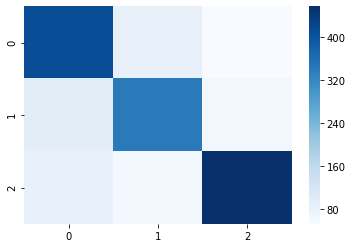

In [411]:
#cm = pd.DataFrame(confusion_matrix(y, y_pred))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

sns.heatmap(cm, fmt="",cmap='Blues')

In [441]:
#print(classification_report(y,y_pred))
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.70      0.75      0.72       548
          1       0.70      0.68      0.69       505
          2       0.79      0.76      0.78       603

avg / total       0.73      0.73      0.73      1656



In [389]:
#Awesome! Let's cross-validate

In [439]:
# kfold = KFold(n_splits=5, random_state=7)
kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(xgb_model, X, y, cv=kfold)

In [440]:
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 71.77% (1.18%)


In [448]:
df_angry_p_s.sample(10)

,Unnamed: 0,title,meta,id,artist,artist_factor,danceability,energy,key,mode,acousticness,instrumentalness,tempo,valence,speechiness,loudness,label
1266,1424,Vibe Slow,spotify:track:5BA22Ev5npphLPCbBM06jM,5BA22Ev5npphLPCbBM06jM,Kendrick P.,523,0.766,0.621,7,1,0.259,0,120.004,0.466,0.0473,-6.974,angry
1515,1866,Untold,spotify:track:2X2sn7N7HMSB8jKhVP2AJY,2X2sn7N7HMSB8jKhVP2AJY,Jinsang,759,0.705,0.209,2,1,0.727,0.845,83.302,0.507,0.199,-15.061,sad
871,871,Poker Face,spotify:track:1QV6tiMFM6fSOKOGLMHYYg,1QV6tiMFM6fSOKOGLMHYYg,Lady Gaga,99,0.851,0.806,4,1,0.118,1.64e-06,118.999,0.787,0.0787,-4.62,party
1237,1572,Me Desamaste,spotify:track:0f93qtsyohg7a07LUzG2PZ,0f93qtsyohg7a07LUzG2PZ,Carlos Sadness,636,0.718,0.756,5,1,0.0275,4.09e-06,161.977,0.837,0.0797,-6.815,sad
602,638,The Sound of Silence,spotify:track:0eZBeB2xFIS65jQHerispi,0eZBeB2xFIS65jQHerispi,Disturbed,146,0.322,0.28,6,0,0.468,1.1e-06,85.794,0.175,0.0281,-9.367,angry
6950,6950,Naughty,spotify:track:0P8lbWigAHXPKxUG60xh79,0P8lbWigAHXPKxUG60xh79,Red Velvet - IRENE & SEULGI,2696,0.693,0.759,7,1,0.055,1.36e-06,112.983,0.635,0.208,-2.9,party
1062,1362,Invincible,spotify:track:792HwhrdO3ErRKL5yRe4Ge,792HwhrdO3ErRKL5yRe4Ge,Pop Smoke,569,0.548,0.732,11,0,0.125,0,142.791,0.612,0.336,-5.652,sad
3463,4484,I Fall Apart,spotify:track:2mdxJLJHzFmiiYdTZ8JcyH,2mdxJLJHzFmiiYdTZ8JcyH,Post Malone,66,0.565,0.55,8,0,0.0782,0,143.927,0.302,0.0397,-5.357,sad
6867,6867,Atemlos durch die Nacht - Bassflow Main Radio/...,spotify:track:6oZLgfZMI00Lvb0dNUKhFL,6oZLgfZMI00Lvb0dNUKhFL,Helene Fischer,476,0.624,0.909,11,1,0.0176,0,128.027,0.502,0.0411,-4.45,party
517,547,Getting Away With Murder,spotify:track:02MjAy2BTPTdqO19O5VtHO,02MjAy2BTPTdqO19O5VtHO,Papa Roach,82,0.557,0.959,1,1,0.000113,8.04e-05,103.887,0.331,0.0547,-4.632,angry


In [477]:
pd.read_csv("chill_frame.csv").shape

(3769, 17)

## Multi-Label Classification 

In [489]:
df_angry_p_s_mc =  df_angry_p_s.copy()

In [490]:
one_hot = pd.get_dummies(df_angry_p_s_mc['label'])
# Drop column B as it is now encoded
df_angry_p_s_mc = df_angry_p_s_mc.drop('label',axis = 1)
# Join the encoded df
df_angry_p_s_mc = df_angry_p_s_mc.join(one_hot)

In [503]:
df_angry_p_s_mc.sort_values("id")[250:280]  

,Unnamed: 0,title,meta,id,artist,artist_factor,danceability,energy,key,mode,acousticness,instrumentalness,tempo,valence,speechiness,loudness,angry,party,sad
1305,1463,You Made My Day,spotify:track:07qBvrEwIMy3tj5gsVgLYD,07qBvrEwIMy3tj5gsVgLYD,Latiana,553,0.815,0.573,0,1,0.181,0,121.139,0.642,0.211,-6.782,0,0,1
1305,1463,You Made My Day,spotify:track:07qBvrEwIMy3tj5gsVgLYD,07qBvrEwIMy3tj5gsVgLYD,Latiana,553,0.815,0.573,0,1,0.181,0,121.139,0.642,0.211,-6.782,1,0,0
1042,1143,Tangled in the Great Escape (feat. Jason Butler),spotify:track:07rOH5op4n0CF9Oz1EftFb,07rOH5op4n0CF9Oz1EftFb,Pierce The Veil,421,0.284,0.939,4,0,0.00711,1.65e-05,105.02,0.127,0.109,-3.788,1,0,0
4912,6515,check up on your friends,spotify:track:07rhoLFlB1NyH2l4ZrvoES,07rhoLFlB1NyH2l4ZrvoES,Carter Powers,2050,0.925,0.252,10,1,0.887,0.00022,127.982,0.513,0.272,-14.308,0,0,1
590,625,Let This Go,spotify:track:080vUwbzEgnW3rz3Px0Kht,080vUwbzEgnW3rz3Px0Kht,Five Finger Death Punch,165,0.443,0.993,7,1,4.78e-05,3.84e-06,193.939,0.33,0.205,-3.365,0,0,1
590,625,Let This Go,spotify:track:080vUwbzEgnW3rz3Px0Kht,080vUwbzEgnW3rz3Px0Kht,Five Finger Death Punch,165,0.443,0.993,7,1,4.78e-05,3.84e-06,193.939,0.33,0.205,-3.365,1,0,0
2757,3424,Comfortably Numb - 2011 Remastered Version,spotify:track:082cLCIXNPg2ruTrENz4Vt,082cLCIXNPg2ruTrENz4Vt,Pink Floyd,1058,0.472,0.366,11,0,0.15,0.308,127.167,0.171,0.0286,-12.595,1,0,0
1198,1354,A Little Faster,spotify:track:087C6wCxtAOf0J9UQzF9Ht,087C6wCxtAOf0J9UQzF9Ht,There For Tomorrow,474,0.404,0.946,5,0,0.000842,0,169.082,0.787,0.174,-3.318,0,0,1
1198,1354,A Little Faster,spotify:track:087C6wCxtAOf0J9UQzF9Ht,087C6wCxtAOf0J9UQzF9Ht,There For Tomorrow,474,0.404,0.946,5,0,0.000842,0,169.082,0.787,0.174,-3.318,1,0,0
2018,2513,Crayola,spotify:track:08T4lSobn8UP6PQc9qtTzT,08T4lSobn8UP6PQc9qtTzT,9lokknine,843,0.729,0.538,7,1,0.0218,0,80.474,0.173,0.152,-9.63,0,0,1


ValueError: Unexpected character found when decoding 'false'